In [1]:
"""
Purpose: To set up the tables that will 
be used for validation and to test the 
overall progress

"""

'\nPurpose: To set up the tables that will \nbe used for validation and to test the \noverall progress\n\n'

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from os import sys
sys.path.append("/meshAfterParty/")
sys.path.append("/meshAfterParty/meshAfterParty/")

In [68]:
import datajoint_utils as du
minnie,schema = du.configure_minnie_vm()

INFO - 2021-02-24 06:39:41,798 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-02-24 06:39:41,799 - settings - Setting database.user to celiib
INFO - 2021-02-24 06:39:41,800 - settings - Setting database.password to newceliipass
INFO - 2021-02-24 06:39:41,804 - settings - Setting enable_python_native_blobs to True
INFO - 2021-02-24 06:39:42,449 - settings - Setting enable_python_native_blobs to True
INFO - 2021-02-24 06:39:43,239 - settings - Setting enable_python_native_blobs to True
INFO - 2021-02-24 06:39:43,860 - settings - Setting enable_python_native_blobs to True


In [5]:
from pathlib import Path
import numpy as np
import neuron_visualizations as nviz
import datajoint as dj

import proofreading_utils as pru
import classification_utils as clu

import neuron_utils as nru
import validation_utils as vu
import pandas as pd

INFO - 2021-02-24 04:35:41,273 - settings - Setting enable_python_native_blobs to True
INFO - 2021-02-24 04:35:41,656 - settings - Setting enable_python_native_blobs to True


# Creating the Tables To Hold the Synapses

In [6]:
"""
Purpose:  Create the Synapse Table
that has no auto-synapses and is unique
that looks like the NucleusSynapse Table


"""

'\nPurpose:  Create the Synapse Table\nthat has no auto-synapses and is unique\nthat looks like the NucleusSynapse Table\n\n\n'

In [7]:
du.m65mat.NucleusSynapse.describe()

# Synapses between segments with nuclei from 'nucleus_detection_v0'
-> du.m65mat.Materialization
synapse_id           : bigint unsigned              # synapse index within the segmentation
presyn               : bigint unsigned              # segment_id of the presynaptic cell. Equivalent to Allen 'pt_root_id'.
postsyn              : bigint unsigned              # segment_id of the postsynaptic cell. Equivalent to Allen 'pt_root_id'.
---
synapse_x            : int unsigned                 # x coordinate of synapse centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm). From Allen 'ctr_pt_position'.
synapse_y            : int unsigned                 # y coordinate of centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm). From Allen 'ctr_pt_position'.
synapse_z            : int unsigned                 # z coordinate of centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm). From Allen 'ctr_pt_position'.
synapse_size         : int unsigned                 # (EM voxels) scaled by (4x4x40)



"# Synapses between segments with nuclei from 'nucleus_detection_v0'\n-> du.m65mat.Materialization\nsynapse_id           : bigint unsigned              # synapse index within the segmentation\npresyn               : bigint unsigned              # segment_id of the presynaptic cell. Equivalent to Allen 'pt_root_id'.\npostsyn              : bigint unsigned              # segment_id of the postsynaptic cell. Equivalent to Allen 'pt_root_id'.\n---\nsynapse_x            : int unsigned                 # x coordinate of synapse centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm). From Allen 'ctr_pt_position'.\nsynapse_y            : int unsigned                 # y coordinate of centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm). From Allen 'ctr_pt_position'.\nsynapse_z            : int unsigned                 # z coordinate of centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm). From Allen 'ctr_pt_position'.\nsynapse_size         : int unsigned                 # (EM voxels) scaled by (4x4x40)\n"

In [8]:
@schema
class AutoProofreadValidationNucleusSynapse(dj.Manual):
    definition="""
    -> du.m65mat.Materialization
    synapse_id           : bigint unsigned              # synapse index within the segmentation
    presyn               : bigint unsigned              # segment_id of the presynaptic cell. Equivalent to Allen 'pt_root_id'.
    postsyn              : bigint unsigned              # segment_id of the postsynaptic cell. Equivalent to Allen 'pt_root_id'.
    ---
    synapse_x            : int unsigned                 # x coordinate of synapse centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm). From Allen 'ctr_pt_position'.
    synapse_y            : int unsigned                 # y coordinate of centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm). From Allen 'ctr_pt_position'.
    synapse_z            : int unsigned                 # z coordinate of centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm). From Allen 'ctr_pt_position'.
    synapse_size         : int unsigned                 # (EM voxels) scaled by (4x4x40)

    """

In [9]:
validation_folder = Path("./aug_syn_files/")
val_file_names = list(validation_folder.iterdir())

In [59]:
for v in val_file_names:
    vu.insert_synapse_file_into_valdiation_synapse(synapse_filepath=v,
                                                    debug=False,
                                                    ver = 0.08,
                                                    verbose=True,
                                                    )

INFO - 2021-02-24 05:09:46,859 - settings - Setting enable_python_native_blobs to True
INFO - 2021-02-24 05:09:47,384 - settings - Setting enable_python_native_blobs to True


Working on 864691135748569897
Working on 864691136311740477
Working on 864691136535575714
Working on 864691136008573614
Working on 864691135737672084
Working on 864691136201041854
Working on 864691136105491417
Working on 864691135382947307
Working on 864691135737374100
Working on 864691135589907979
Working on 864691135348272855
Working on 864691135974454639
Working on 864691135736387732
Working on 864691135510455760
Working on 864691136194042326
Working on 864691135925564174
Working on 864691135735426708
Working on 864691136056391384
Working on 864691135393964789
Working on 864691136333787571
Working on 864691136537220258
Working on 864691135945413668
Working on 864691135212632448
Working on 864691136008425132
Working on 864691135501578306
Working on 864691135233108569
Working on 864691135748568361
Working on 864691135771629819
Working on 864691136003930314
Working on 864691135373402824
Working on 864691135272164113
Working on 864691136370815112
Working on 864691136333776819
Working on

# Inspecting the Proofread Cells for the Vallidation Set

In [69]:
minnie.AutoProofreadValidationNeurons()

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),split_index the index of the neuron object that resulted AFTER THE SPLITTING ALGORITHM,proof_version the version of code used for this cell typing classification,multiplicity the total number of neurons that came from the parent segment id,cell_type_predicted morphology predicted by classifier,spine_category,n_axons Number of axon candidates identified,n_apicals Number of apicals identified,axon_length length (in um) of the classified axon skeleton,axon_area # area (in um^2) of the classified axon,nucleus_id id of nucleus from the flat segmentation Equivalent to Allen: 'id'.,nuclei_distance the distance to the closest nuclei (even if no matching nuclei found),n_nuclei_in_radius the number of nuclei within the search radius of 15000 belonging to that segment,n_nuclei_in_bbox the number of nuclei within the bounding box of that soma,"soma_x x coordinate of nucleus centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm)","soma_y y coordinate of nucleus centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm)","soma_z z coordinate of nucleus centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm)",max_soma_n_faces The largest number of faces of the somas,max_soma_volume The largest volume of the somas the (volume in billions (10*9 nm^3)),n_vertices number of vertices,n_faces number of faces,n_not_processed_soma_containing_meshes the number of meshes with somas that were not processed,n_error_limbs the number of limbs that are touching multiple somas or 1 soma in multiple places,n_same_soma_multi_touching_limbs number of limbs that touch the same soma multiple times,n_multi_soma_touching_limbs number of limbs that touch multiple somas,n_somas number of soma meshes detected,n_limbs,n_branches,max_limb_n_branches,skeletal_length,max_limb_skeletal_length,median_branch_length gives information on average skeletal length to next branch point,width_median median width from mesh center without spines removed,width_no_spine_median median width from mesh center with spines removed,width_90_perc 90th percentile for width without spines removed,width_no_spine_90_perc 90th percentile for width with spines removed,n_spines,spine_density n_spines/ skeletal_length,spines_per_branch,skeletal_length_eligible the skeletal length for all branches searched for spines,n_spine_eligible_branches the number of branches that were checked for spines because passed width threshold,spine_density_eligible n_spines/skeletal_length_eligible,spines_per_branch_eligible n_spines/n_spine_eligible_branches,total_spine_volume the sum of all spine volume,spine_volume_median median of the spine volume for those spines with able to calculate volume,spine_volume_density total_spine_volume/skeletal_length,spine_volume_density_eligible total_spine_volume/skeletal_length_eligible,spine_volume_per_branch_eligible total_spine_volume/n_spine_eligible_branches,axon_angle_maximum the anlge of an identified axon,spine_density_classifier the number of spines divided by skeletal length for branches analyzed in classification,n_branches_processed the number branches used for the spine density analysis,skeletal_length_processed The total skeletal length of the viable branches used for the spine density analysis,n_branches_in_search_radius the number branches existing in the search radius used for spine density,skeletal_length_in_search_radius The total skeletal length of the branches existing in the search radius used for spine density,run_time the amount of time to run (seconds)
864691135564655959,0,0.25,30.00,5,0,0,2,1,excitatory,densely_spined,1,1,247.9969008330621,224.6702647100554,225498,575.75,1,1,149581,151682,17553,

In [71]:
segment_id = 864691135564655959

In [87]:
import validation_utils as vu

In [90]:
curr_table = du.segment_id_to_synapse_table(segment_id,
                              validation=True)

curr_table & dict(presyn=segment_id)

ver materialization version,synapse_id synapse index within the segmentation,presyn segment_id of the presynaptic cell. Equivalent to Allen 'pt_root_id'.,postsyn segment_id of the postsynaptic cell. Equivalent to Allen 'pt_root_id'.,"synapse_x x coordinate of synapse centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm). From Allen 'ctr_pt_position'.","synapse_y y coordinate of centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm). From Allen 'ctr_pt_position'.","synapse_z z coordinate of centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm). From Allen 'ctr_pt_position'.",synapse_size (EM voxels) scaled by (4x4x40)
0.08,83426975,864691135564655959,864691133699275600,133380,160508,17465,344
0.08,87760452,864691135564655959,864691133177893800,138070,145478,16412,1696
0.08,93206835,864691135564655959,864691136281922700,139868,136342,17283,2540
0.08,93206846,864691135564655959,864691132656400300,139884,136254,17287,2788
0.08,104175170,864691135564655959,864691135012436200,146134,170094,15244,3084
0.08,106101009,864691135564655959,864691135404725200,146765,173910,16630,1152
0.08,106138063,864691135564655959,864691135012868200,146512,168872,16025,5408
0.08,107780495,864691135564655959,864691136388573700,149870,146624,17466,1160
0.08,107990692,864691135564655959,864691136132043600,148080,169678,15777,2812
0.08,108108853,864691135564655959,864691135012868200,147056,169182,15997,11292


In [88]:
vu.fetch_manual_synapse_table(segment_id,
                             synapse_type=)

,segment_id,id,pre_pt_root_id,post_pt_root_id,pre_pt_root_id_Aug,post_pt_root_id_Aug,ctr_pt_position,size
0,864691135564655959,73304048,8.646911e+17,8.646911e+17,8.646911e+17,8.646911e+17,"[127908, 167052, 17871]",3612.0
1,864691135564655959,73304593,8.646911e+17,8.646911e+17,8.646911e+17,8.646911e+17,"[128589, 167786, 17822]",3108.0
2,864691135564655959,73306111,8.646911e+17,8.646911e+17,8.646911e+17,8.646911e+17,"[130077, 167150, 17885]",23064.0
3,864691135564655959,74373803,8.646911e+17,8.646911e+17,8.646911e+17,8.646911e+17,"[129122, 166868, 17865]",204.0
4,864691135564655959,74374308,8.646911e+17,8.646911e+17,8.646911e+17,8.646911e+17,"[129914, 166740, 17818]",10364.0
...,...,...,...,...,...,...,...,...
1223,864691135564655959,144097378,8.646911e+17,8.646911e+17,8.646911e+17,8.646911e+17,"[167796, 148108, 15651]",3952.0
1224,864691135564655959,144097517,8.646911e+17,8.646911e+17,8.646911e+17,8.646911e+17,"[167922, 146942, 15630]",3132.0
1225,864691135564655959,144097533,8.646911e+17,8.646911e+17,8.646911e+17,8.646911e+17,"[167952, 147926, 15620]",13312.0
1226,864691135564655959,144097575,8.646911e+17,8.646911e+17,8.646911e+17,8.646911e+17,"[168002, 147510, 15639]",1424.0


In [93]:
du.plot_proofread_neuron(segment_id=segment_id,
                       split_index=0,


                      #for plotting the error faces
                       plot_errored_faces=True,
                       errored_faces_color=[1,0,0,0.2],

                      #for plotting the synapse
                      plot_synapses=True,
                      synapse_scatter_size=0.3,
                      valid_presyn_color="yellow",
                      valid_postsyn_color="aqua",
                      error_presyn_color="black",
                      error_postsyn_color="orange",


                      plot_nuclei=True,
                      nuclei_color = "brown",
                      nuclei_size = 1,#2500,
                      nuclei_plot_type="scatter",#other option is mesh

                      plot_paired_nuceli=True,
                      paired_nuclei_color = "lime",

                      plot_axon=True,
                      validation = True,
                         
                         plot_error_synapses=True,

              verbose=False,
                      )

Decompressing Neuron in minimal output mode...please wait
Pulled from Table Decomposition so setting split_index = 0
Dont need spine recalculation
Number of Neurons found = 1
Synapsse Results:
Total Number of Synapses = 1221
n_valid_syn_centers_presyn = 16
n_errored_syn_centers_presyn = 72
n_valid_syn_centers_postsyn = 1124
n_errored_syn_centers_postsyn = 9
Including axon mesh


# checking the Synapse Plotting Using Old Way

In [120]:
synapse_coordinate_dict,synape_id_dict = vu.valid_errored_proofread_synapses(original_segment_id = segment_id,
    synapse_df=vu.fetch_manual_synapse_table(segment_id),
                                    
    # parameters for the plotting of the synapses
    plot_synapses=True,
    synapses_type_to_plot=["valid_syn_centers_presyn",
                                  "errored_syn_centers_presyn"],
    synapses_type_to_not_plot = None,
    
    return_synapse_ids = True, 
    verbose = True,)

new_segment_id = 864691135724333739
Number of synapses in original file = 1221
Number of synapses after filtering away self connections = 1221


# Calculating the Statistics For the Neuron Proofreading

In [182]:
minnie.AutoProofreadValidationNeurons()

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),split_index the index of the neuron object that resulted AFTER THE SPLITTING ALGORITHM,proof_version the version of code used for this cell typing classification,multiplicity the total number of neurons that came from the parent segment id,cell_type_predicted morphology predicted by classifier,spine_category,n_axons Number of axon candidates identified,n_apicals Number of apicals identified,axon_length length (in um) of the classified axon skeleton,axon_area # area (in um^2) of the classified axon,nucleus_id id of nucleus from the flat segmentation Equivalent to Allen: 'id'.,nuclei_distance the distance to the closest nuclei (even if no matching nuclei found),n_nuclei_in_radius the number of nuclei within the search radius of 15000 belonging to that segment,n_nuclei_in_bbox the number of nuclei within the bounding box of that soma,"soma_x x coordinate of nucleus centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm)","soma_y y coordinate of nucleus centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm)","soma_z z coordinate of nucleus centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm)",max_soma_n_faces The largest number of faces of the somas,max_soma_volume The largest volume of the somas the (volume in billions (10*9 nm^3)),n_vertices number of vertices,n_faces number of faces,n_not_processed_soma_containing_meshes the number of meshes with somas that were not processed,n_error_limbs the number of limbs that are touching multiple somas or 1 soma in multiple places,n_same_soma_multi_touching_limbs number of limbs that touch the same soma multiple times,n_multi_soma_touching_limbs number of limbs that touch multiple somas,n_somas number of soma meshes detected,n_limbs,n_branches,max_limb_n_branches,skeletal_length,max_limb_skeletal_length,median_branch_length gives information on average skeletal length to next branch point,width_median median width from mesh center without spines removed,width_no_spine_median median width from mesh center with spines removed,width_90_perc 90th percentile for width without spines removed,width_no_spine_90_perc 90th percentile for width with spines removed,n_spines,spine_density n_spines/ skeletal_length,spines_per_branch,skeletal_length_eligible the skeletal length for all branches searched for spines,n_spine_eligible_branches the number of branches that were checked for spines because passed width threshold,spine_density_eligible n_spines/skeletal_length_eligible,spines_per_branch_eligible n_spines/n_spine_eligible_branches,total_spine_volume the sum of all spine volume,spine_volume_median median of the spine volume for those spines with able to calculate volume,spine_volume_density total_spine_volume/skeletal_length,spine_volume_density_eligible total_spine_volume/skeletal_length_eligible,spine_volume_per_branch_eligible total_spine_volume/n_spine_eligible_branches,axon_angle_maximum the anlge of an identified axon,spine_density_classifier the number of spines divided by skeletal length for branches analyzed in classification,n_branches_processed the number branches used for the spine density analysis,skeletal_length_processed The total skeletal length of the viable branches used for the spine density analysis,n_branches_in_search_radius the number branches existing in the search radius used for spine density,skeletal_length_in_search_radius The total skeletal length of the branches existing in the search radius used for spine density,run_time the amount of time to run (seconds)
864691135113167769,0,0.25,30.00,5,0,0,2,1,excitatory,densely_spined,1,1,1521.4480575529685,1676.4575752748142,335175,917.6,1,1,198908,188769,19783

In [183]:
total_val_df = vu.synapse_validation_df()
vu.scores_presyn(total_val_df),vu.scores_postsyn(total_val_df),vu.scores(total_val_df)

Synapsse Results:
Total Number of Synapses = 3806
n_valid_syn_ids_presyn = 138
n_errored_syn_ids_presyn = 159
n_valid_syn_ids_postsyn = 3358
n_errored_syn_ids_postsyn = 151
Synapsse Results:
Total Number of Synapses = 4434
n_valid_syn_ids_presyn = 109
n_errored_syn_ids_presyn = 412
n_valid_syn_ids_postsyn = 3900
n_errored_syn_ids_postsyn = 13
Synapsse Results:
Total Number of Synapses = 2717
n_valid_syn_ids_presyn = 61
n_errored_syn_ids_presyn = 22
n_valid_syn_ids_postsyn = 2631
n_errored_syn_ids_postsyn = 3
Synapsse Results:
Total Number of Synapses = 4633
n_valid_syn_ids_presyn = 164
n_errored_syn_ids_presyn = 127
n_valid_syn_ids_postsyn = 4328
n_errored_syn_ids_postsyn = 14
Synapsse Results:
Total Number of Synapses = 3713
n_valid_syn_ids_presyn = 67
n_errored_syn_ids_presyn = 193
n_valid_syn_ids_postsyn = 2830
n_errored_syn_ids_postsyn = 623
Synapsse Results:
Total Number of Synapses = 8418
n_valid_syn_ids_presyn = 66
n_errored_syn_ids_presyn = 318
n_valid_syn_ids_postsyn = 8019
n_

Synapsse Results:
Total Number of Synapses = 1159
n_valid_syn_ids_presyn = 191
n_errored_syn_ids_presyn = 90
n_valid_syn_ids_postsyn = 807
n_errored_syn_ids_postsyn = 71
Synapsse Results:
Total Number of Synapses = 6246
n_valid_syn_ids_presyn = 60
n_errored_syn_ids_presyn = 331
n_valid_syn_ids_postsyn = 5697
n_errored_syn_ids_postsyn = 158
Synapsse Results:
Total Number of Synapses = 1760
n_valid_syn_ids_presyn = 236
n_errored_syn_ids_presyn = 54
n_valid_syn_ids_postsyn = 1469
n_errored_syn_ids_postsyn = 1
Synapsse Results:
Total Number of Synapses = 3772
n_valid_syn_ids_presyn = 103
n_errored_syn_ids_presyn = 310
n_valid_syn_ids_postsyn = 3323
n_errored_syn_ids_postsyn = 36
Synapsse Results:
Total Number of Synapses = 6474
n_valid_syn_ids_presyn = 90
n_errored_syn_ids_presyn = 361
n_valid_syn_ids_postsyn = 6018
n_errored_syn_ids_postsyn = 5
Synapsse Results:
Total Number of Synapses = 4377
n_valid_syn_ids_presyn = 5
n_errored_syn_ids_presyn = 196
n_valid_syn_ids_postsyn = 4155
n_error

({'precision': 0.5011141371626641,
  'recall': 0.9059982094897046,
  'f1': 0.6453052765821775},
 {'precision': 0.9974431240375395,
  'recall': 0.9914512635379061,
  'f1': 0.9944381680716086},
 {'precision': 0.9879215924689253,
  'recall': 0.9905421365437367,
  'f1': 0.98923012900541})

In [357]:
segment_ids = du.proofreading_stats_table(validation=True).fetch("segment_id")

validation_dfs = [vu.synapse_validation_df_single_neuron(k,
                                        remove_presyn_on_dendrite = False,
                        count_presyn_on_dendrite_as_correct = True,) for k in segment_ids]

Synapsse Results:
Total Number of Synapses = 3806
n_valid_syn_ids_presyn = 138
n_errored_syn_ids_presyn = 159
n_valid_syn_ids_postsyn = 3358
n_errored_syn_ids_postsyn = 151
Synapsse Results:
Total Number of Synapses = 4434
n_valid_syn_ids_presyn = 109
n_errored_syn_ids_presyn = 412
n_valid_syn_ids_postsyn = 3900
n_errored_syn_ids_postsyn = 13
Synapsse Results:
Total Number of Synapses = 2717
n_valid_syn_ids_presyn = 61
n_errored_syn_ids_presyn = 22
n_valid_syn_ids_postsyn = 2631
n_errored_syn_ids_postsyn = 3
Synapsse Results:
Total Number of Synapses = 4633
n_valid_syn_ids_presyn = 164
n_errored_syn_ids_presyn = 127
n_valid_syn_ids_postsyn = 4328
n_errored_syn_ids_postsyn = 14
Synapsse Results:
Total Number of Synapses = 3713
n_valid_syn_ids_presyn = 67
n_errored_syn_ids_presyn = 193
n_valid_syn_ids_postsyn = 2830
n_errored_syn_ids_postsyn = 623
Synapsse Results:
Total Number of Synapses = 8418
n_valid_syn_ids_presyn = 66
n_errored_syn_ids_presyn = 318
n_valid_syn_ids_postsyn = 8019
n_

Synapsse Results:
Total Number of Synapses = 1159
n_valid_syn_ids_presyn = 191
n_errored_syn_ids_presyn = 90
n_valid_syn_ids_postsyn = 807
n_errored_syn_ids_postsyn = 71
Synapsse Results:
Total Number of Synapses = 6246
n_valid_syn_ids_presyn = 60
n_errored_syn_ids_presyn = 331
n_valid_syn_ids_postsyn = 5697
n_errored_syn_ids_postsyn = 158
Synapsse Results:
Total Number of Synapses = 1760
n_valid_syn_ids_presyn = 236
n_errored_syn_ids_presyn = 54
n_valid_syn_ids_postsyn = 1469
n_errored_syn_ids_postsyn = 1
Synapsse Results:
Total Number of Synapses = 3772
n_valid_syn_ids_presyn = 103
n_errored_syn_ids_presyn = 310
n_valid_syn_ids_postsyn = 3323
n_errored_syn_ids_postsyn = 36
Synapsse Results:
Total Number of Synapses = 6474
n_valid_syn_ids_presyn = 90
n_errored_syn_ids_presyn = 361
n_valid_syn_ids_postsyn = 6018
n_errored_syn_ids_postsyn = 5
Synapsse Results:
Total Number of Synapses = 4377
n_valid_syn_ids_presyn = 5
n_errored_syn_ids_presyn = 196
n_valid_syn_ids_postsyn = 4155
n_error

# Compute Statistics Visuals

In [359]:
validation_dfs[0]["old_segment_id"]

0       864691136008425132
1       864691136008425132
2       864691136008425132
3       864691136008425132
4       864691136008425132
               ...        
4234    864691136008425132
4235    864691136008425132
4236    864691136008425132
4237    864691136008425132
4238    864691136008425132
Name: old_segment_id, Length: 4239, dtype: int64

In [364]:
score_dfs = [vu.synapse_validation_df_to_score_df(v_df)
             for v_df in validation_dfs]
score_dfs[1]

,precision,recall,f1,Type,old_segment_id,new_segment_id
0,0.357798,0.070397,0.117647,presyn,864691135589907979,864691135937286404
1,0.996667,0.937756,0.966314,postsyn,864691135589907979,864691135937286404
2,0.979297,0.835497,0.901700,both,864691135589907979,864691135937286404


<Figure size 1440x1440 with 0 Axes>

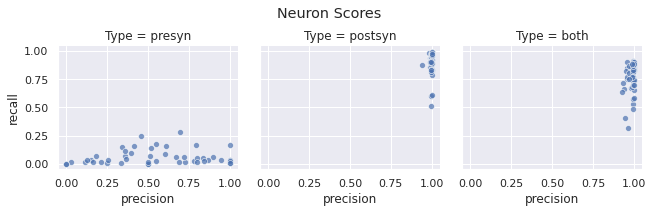

In [361]:
vu.score_scatterplot(df = score_dfs)

# Computing the FP,FN information

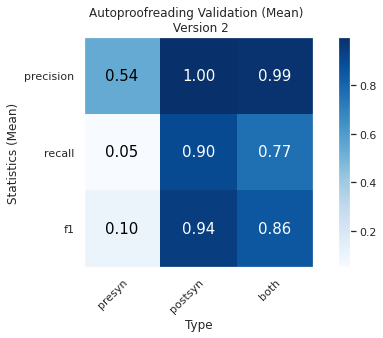

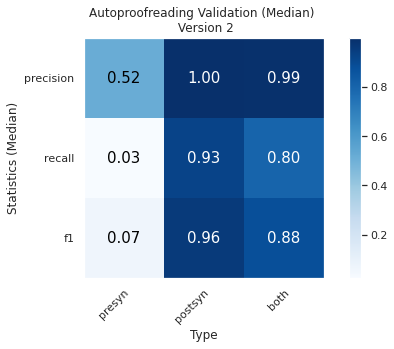

In [301]:
new_dict = pd.concat(score_dfs)[["Type","recall","precision","f1"]]
collapsed_df = new_dict.groupby("Type").mean()

vu.plot_scores(#need to order by 
    score_df = collapsed_df,
    synapse_types = ["presyn","postsyn","both"],
    score_types = ["precision","recall","f1"],
    y_label='Statistics (Mean)',
    title = "Autoproofreading Validation (Mean) \n Version 2")

collapsed_df = new_dict.groupby("Type").median()

vu.plot_scores(#need to order by 
    score_df = collapsed_df,
    synapse_types = ["presyn","postsyn","both"],
    score_types = ["precision","recall","f1"],
    y_label='Statistics (Median)',
    title = "Autoproofreading Validation (Median) \n Version 2")

# The complete numbers

In [365]:
validation_dfs_combined = pd.concat(validation_dfs)

score_combined = vu.synapse_validation_df_to_score_df(validation_dfs_combined)
total_score_df = score_combined[["Type","precision","recall","f1"]]
total_score_df = total_score_df.set_index("Type")
total_score_df
# score_dfs = [vu.synapse_validation_df_to_score_df(v_df)
#              for v_df in validation_dfs]
# score_dfs[0]

,precision,recall,f1
Type,,,
presyn,0.501114,0.056358,0.101322
postsyn,0.997443,0.915635,0.954790
both,0.987922,0.797340,0.882458


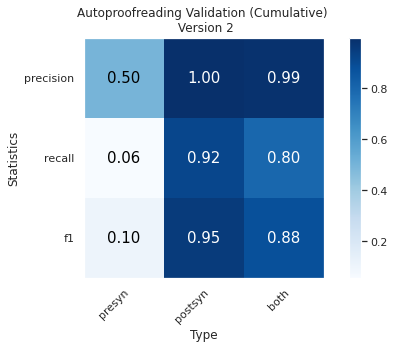

In [304]:
vu.plot_scores(#need to order by 
    score_df = total_score_df,
    synapse_types = ["presyn","postsyn","both"],
    score_types = ["precision","recall","f1"],
    y_label='Statistics',
    title = "Autoproofreading Validation (Cumulative) \n Version 2")

# Visuals

# -- Graph 1 -- 

In [323]:
du.plot_proofread_neuron(segment_id,
                        validation=True)

Using Split Index 0 because None
Including axon mesh


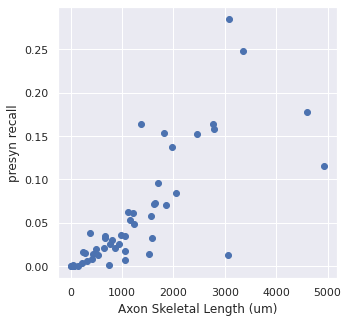

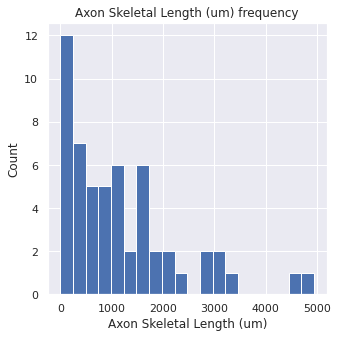

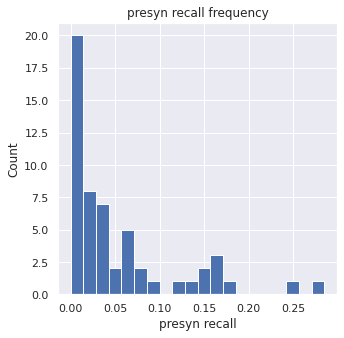

In [382]:
import matplotlib.pyplot as plt

"""
Purpose: To graph a score feature against a neuron morphology statistic

Pseudocode: 
1) Get the score statistic for ever neuron
2) Get the morphological feature for every neuron
3) Plot them against each other
4) Optionally plot the histogram of each as well
"""
synapse_type = "presyn"
score_statistic = "recall"
score_tables = score_dfs
morphology_statistic = "axon_length"
verbose = True
plot_individual_histograms = True
fig_width = 5
fig_height = 5

score_statistic_name = f"{synapse_type} {score_statistic}"
morphology_statistic_name = "Axon Skeletal Length (um)"

#1) Get the score statistic for ever neuron
score_per_neuron = []
morph_per_neuron = []
for j,k in enumerate(score_tables):
    
    #get the neuron name
    curr_segment_id =k["old_segment_id"][0]
    
    curr_score = k[(k["Type"] == synapse_type)][score_statistic].to_list()[0] 
    score_per_neuron.append(curr_score)
    
    

    #2) Get the morphological feature for every neuron
    curr_morph = du.segment_id_to_autoproofread_neuron_features(segment_id = curr_segment_id,
                                                   #split_index = 0,
                                                   statistic_names = [morphology_statistic],
                                                   validation = True,
                                        )
    morph_per_neuron.append(curr_morph)
    
    if False:
        print(f"Working on neuron {j}: {score_statistic} = {curr_score}, {morphology_statistic} = {curr_morph}")

#3) Plot them against each other
fig, ax = plt.subplots(figsize=(fig_width, fig_height))

ax.scatter(morph_per_neuron,score_per_neuron)
ax.set_xlabel(morphology_statistic_name)
ax.set_ylabel(score_statistic_name)
ax.set_title(f"")
fig.show()

if plot_individual_histograms:
    individuals_names = [morphology_statistic_name,score_statistic_name]
    individuals_data = [morph_per_neuron,score_per_neuron]
    
    for n,d in zip(individuals_names,individuals_data):
        fig, ax = plt.subplots(figsize=(fig_width, fig_height))
        ax.hist(d,bins=20)
        ax.set_xlabel(n)
        ax.set_ylabel("Count")
        ax.set_title(f"{n} frequency")
        fig.show()


# Recall Drop Off With Euclidean Distance

In [ ]:
"""
Purpose: To get the recall of each neuron (and overall)
as a function of the euclidean distance from the soma center

Pseudocode: 
a) Get the validation dataframes for all neurons (that come along with the synapse coordinates)
b) Create a range of distance restrictions based on max and min distanes
c) Create a sampling array for distances
d) Iterate through the sampliing:
   i) restrict the table to synapses under that distance
   2) Compute the recall
   3) Save in array
"""

In [491]:
segment_ids = du.proofreading_stats_table(validation=True).fetch("segment_id")

validation_dfs = [vu.synapse_validation_df_single_neuron(k,
                                        remove_presyn_on_dendrite = False,
                        count_presyn_on_dendrite_as_correct = True,) for k in segment_ids]


Synapsse Results:
Total Number of Synapses = 3806
n_valid_syn_ids_presyn = 138
n_errored_syn_ids_presyn = 159
n_valid_syn_ids_postsyn = 3358
n_errored_syn_ids_postsyn = 151
Synapsse Results:
Total Number of Synapses = 4434
n_valid_syn_ids_presyn = 109
n_errored_syn_ids_presyn = 412
n_valid_syn_ids_postsyn = 3900
n_errored_syn_ids_postsyn = 13
Synapsse Results:
Total Number of Synapses = 2717
n_valid_syn_ids_presyn = 61
n_errored_syn_ids_presyn = 22
n_valid_syn_ids_postsyn = 2631
n_errored_syn_ids_postsyn = 3
Synapsse Results:
Total Number of Synapses = 4633
n_valid_syn_ids_presyn = 164
n_errored_syn_ids_presyn = 127
n_valid_syn_ids_postsyn = 4328
n_errored_syn_ids_postsyn = 14
Synapsse Results:
Total Number of Synapses = 3713
n_valid_syn_ids_presyn = 67
n_errored_syn_ids_presyn = 193
n_valid_syn_ids_postsyn = 2830
n_errored_syn_ids_postsyn = 623
Synapsse Results:
Total Number of Synapses = 8418
n_valid_syn_ids_presyn = 66
n_errored_syn_ids_presyn = 318
n_valid_syn_ids_postsyn = 8019
n_

Synapsse Results:
Total Number of Synapses = 1159
n_valid_syn_ids_presyn = 191
n_errored_syn_ids_presyn = 90
n_valid_syn_ids_postsyn = 807
n_errored_syn_ids_postsyn = 71
Synapsse Results:
Total Number of Synapses = 6246
n_valid_syn_ids_presyn = 60
n_errored_syn_ids_presyn = 331
n_valid_syn_ids_postsyn = 5697
n_errored_syn_ids_postsyn = 158
Synapsse Results:
Total Number of Synapses = 1760
n_valid_syn_ids_presyn = 236
n_errored_syn_ids_presyn = 54
n_valid_syn_ids_postsyn = 1469
n_errored_syn_ids_postsyn = 1
Synapsse Results:
Total Number of Synapses = 3772
n_valid_syn_ids_presyn = 103
n_errored_syn_ids_presyn = 310
n_valid_syn_ids_postsyn = 3323
n_errored_syn_ids_postsyn = 36
Synapsse Results:
Total Number of Synapses = 6474
n_valid_syn_ids_presyn = 90
n_errored_syn_ids_presyn = 361
n_valid_syn_ids_postsyn = 6018
n_errored_syn_ids_postsyn = 5
Synapsse Results:
Total Number of Synapses = 4377
n_valid_syn_ids_presyn = 5
n_errored_syn_ids_presyn = 196
n_valid_syn_ids_postsyn = 4155
n_error

In [493]:
# segment_id = 864691136008425132

# curr_mesh = du.fetch_segment_id_mesh(segment_id)
# soma_center = du.fetch_neuron_soma_center(segment_id)
# nviz.plot_objects(curr_mesh,
#                  scatters=[soma_center],
#                  scatter_size=4)


In [494]:
cumulative_validation_df = pd.concat(validation_dfs)

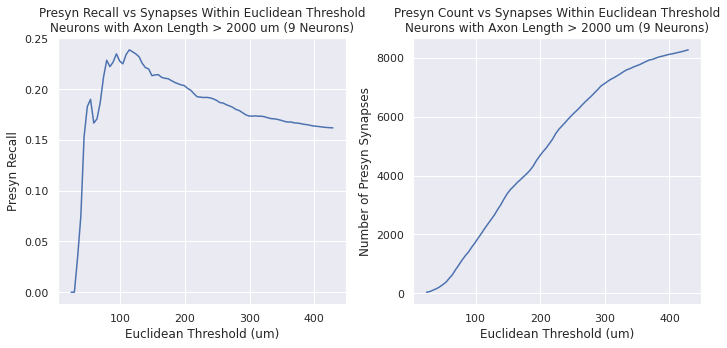

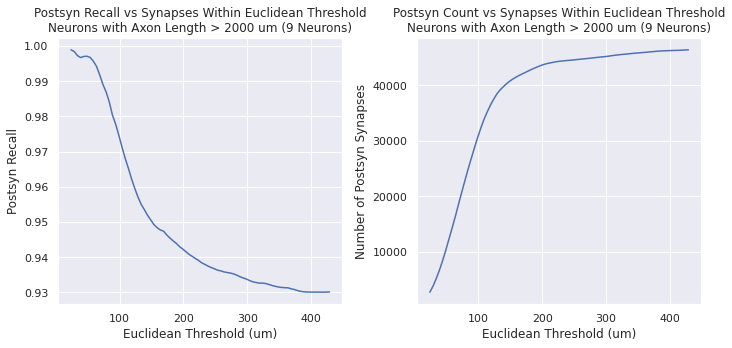

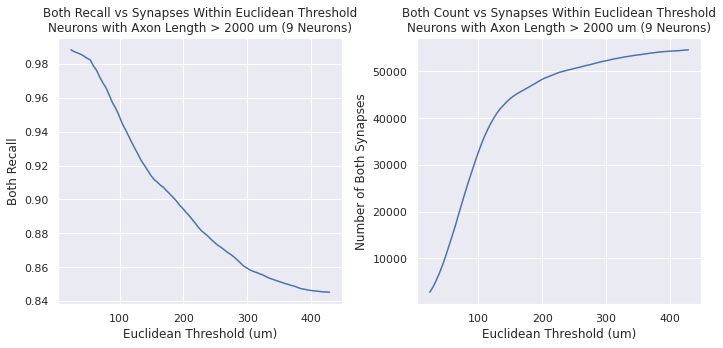

In [559]:
axon_length = 2000
curr_query = f"axon_length>{axon_length}"
curr_query_title = f"Axon Length > {axon_length} um"
seg_ids_in_query = (minnie.AutoProofreadValidationNeurons() & curr_query).fetch("segment_id")

current_validation_df = cumulative_validation_df[cumulative_validation_df["old_segment_id"].isin(seg_ids_in_query)]

vu.score_vs_euclidean_synapse_threshold_analysis(current_validation_df,
                                                title_append=f"Neurons with {curr_query_title} ({len(seg_ids_in_query)} Neurons)")

# Finding The Stats for Different Types of Neurons

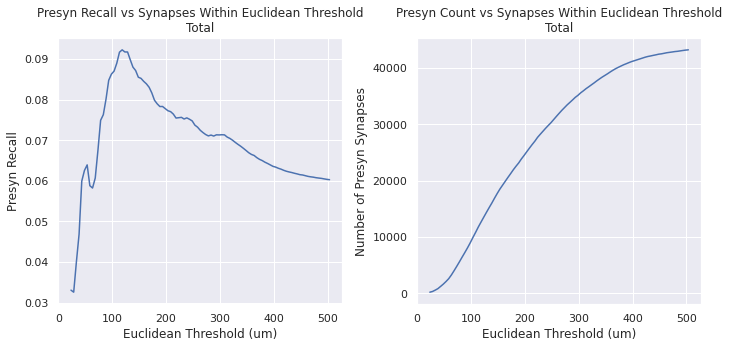

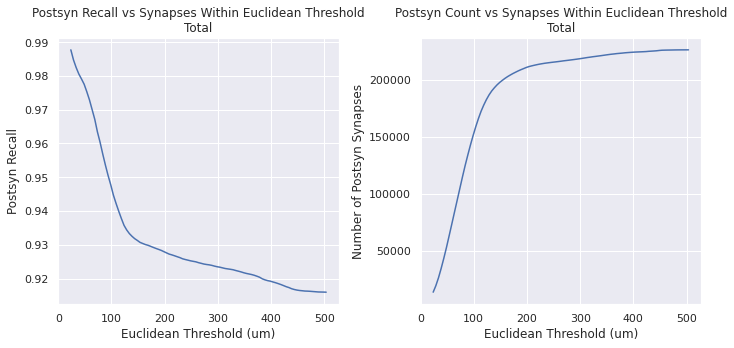

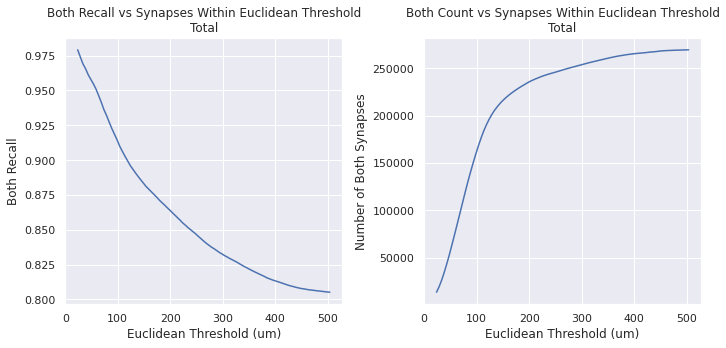

In [540]:
vu.score_vs_euclidean_synapse_threshold_analysis(cumulative_validation_df,
                                                title_append="Total")

# Development of the Recall Plots

In [522]:
vu.synapse_distance_samples(cumulative_validation_df).shape

(97,)

In [532]:
score_dict,n_syn_dict = vu.compute_score_as_function_of_synapse_euclidean_distance(cumulative_validation_df)

In [533]:
score_dict

{'presyn': [0.03305785123966942,
  0.03255813953488372,
  0.04,
  0.04684684684684685,
  0.05992949471210341,
  0.06255430060816682,
  0.06391752577319587,
  0.058790904048807546,
  0.05821764442454098,
  0.06067251461988304,
  0.06748466257668712,
  0.0749073583906829,
  0.07628294036061026,
  0.08011444921316166,
  0.08475509080902587,
  0.08627256168239775,
  0.08702816057519473,
  0.08895916403134882,
  0.09168362156663276,
  0.09226190476190477,
  0.09174107142857142,
  0.09173249078462349,
  0.08982511923688394,
  0.08800300864986838,
  0.08716577540106951,
  0.08551572167132808,
  0.08523002421307506,
  0.08449504337050806,
  0.08388488138618279,
  0.08304721030042918,
  0.08166080419339265,
  0.07984841433415331,
  0.07896598289499067,
  0.07829181494661921,
  0.07830706997524603,
  0.07777647335055177,
  0.07725640002280632,
  0.07702980187579776,
  0.07642899552005182,
  0.0754588000210338,
  0.07554011951580775,
  0.07562815325440832,
  0.07522102281053095,
  0.0754996652959

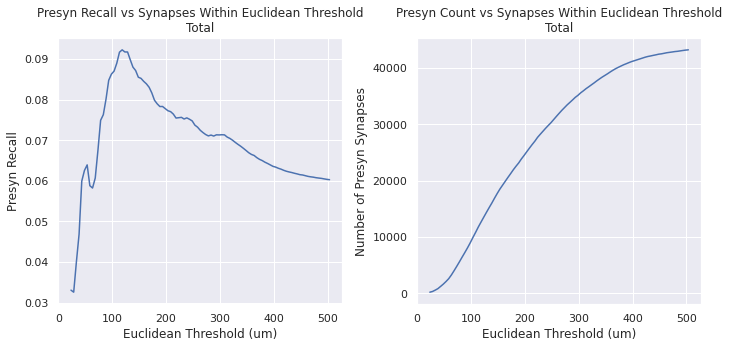

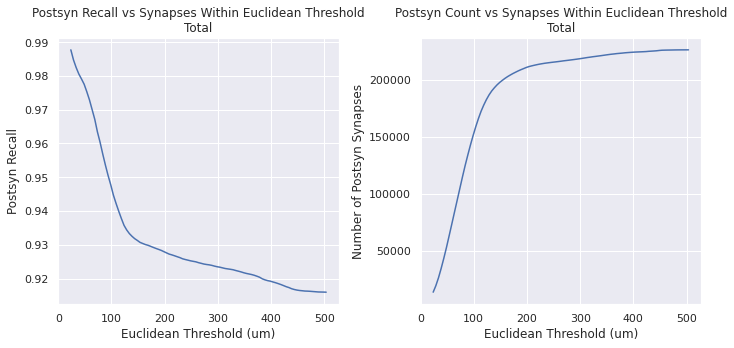

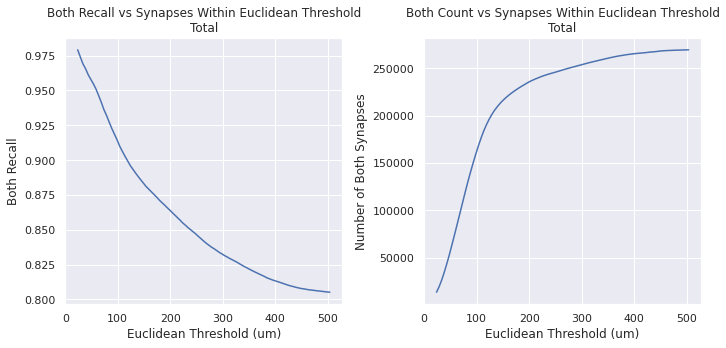

In [539]:
vu.plot_score_as_function_of_synapse_euclidean_distance(score_dict,
                                                     n_synapses_dict=n_syn_dict,
                                                         title_append="Total",
                                                        plot_synapse_histograms=True,
                                                       validation_df =cumulative_validation_df)

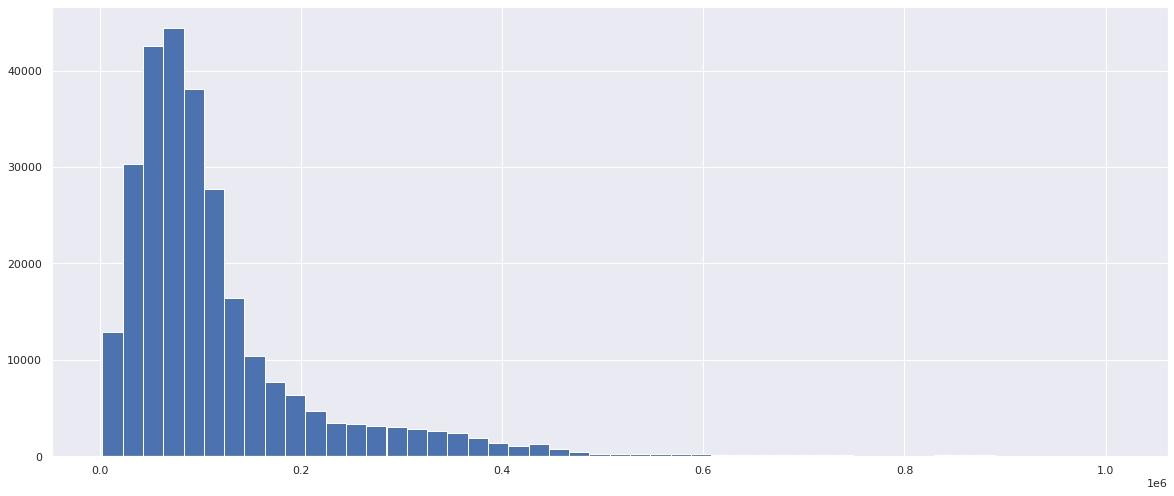

In [495]:
synapse_dist = cumulative_validation_df["euclidean_distance_to_nuclei"].to_numpy()
_ = plt.hist(synapse_dist,bins=50)

In [497]:
syn_distance_boundaries = [np.percentile(synapse_dist,5),np.percentile(synapse_dist,99)]
syn_distance_interval = 5000
syn_distance_samples = np.arange(*syn_distance_boundaries,syn_distance_interval)
syn_distance_samples.shape

(97,)

In [531]:
curr_score[curr_score["Type"] == s_type]["recall"].to_list()[0]

0.8052205492339917

In [527]:
recall_by_synapse_type

{'presyn': [0    0.033058
  Name: recall, dtype: float64,
  0    0.032558
  Name: recall, dtype: float64,
  0    0.04
  Name: recall, dtype: float64,
  0    0.046847
  Name: recall, dtype: float64,
  0    0.059929
  Name: recall, dtype: float64,
  0    0.062554
  Name: recall, dtype: float64,
  0    0.063918
  Name: recall, dtype: float64,
  0    0.058791
  Name: recall, dtype: float64,
  0    0.058218
  Name: recall, dtype: float64,
  0    0.060673
  Name: recall, dtype: float64,
  0    0.067485
  Name: recall, dtype: float64,
  0    0.074907
  Name: recall, dtype: float64,
  0    0.076283
  Name: recall, dtype: float64,
  0    0.080114
  Name: recall, dtype: float64,
  0    0.084755
  Name: recall, dtype: float64,
  0    0.086273
  Name: recall, dtype: float64,
  0    0.087028
  Name: recall, dtype: float64,
  0    0.088959
  Name: recall, dtype: float64,
  0    0.091684
  Name: recall, dtype: float64,
  0    0.092262
  Name: recall, dtype: float64,
  0    0.091741
  Name: recall, dt

In [ ]:
# d) Iterate through the sampliing:
#    i) restrict the table to synapses under that distance
#    2) Compute the recall
#    3) Save in array

In [508]:
curr_table[curr_table["synapse_type"] == "presyn"]

,synapse_id,synapse_type,auto_valid,synapse_x,synapse_y,synapse_z,manual_valid,category,old_segment_id,new_segment_id,euclidean_distance_to_nuclei
34,272617235,presyn,True,972572,747160,667440,False,FP,864691136008425132,864691136378859477,326675.211450
35,279686720,presyn,True,995504,726616,653520,False,FP,864691136008425132,864691136378859477,306088.008730
36,279783252,presyn,True,984520,741056,660840,False,FP,864691136008425132,864691136378859477,316353.313319
37,285718961,presyn,True,1005376,727624,658160,False,FP,864691136008425132,864691136378859477,295526.526891
38,292478386,presyn,True,1027816,724264,660680,False,FP,864691136008425132,864691136378859477,273502.266930
...,...,...,...,...,...,...,...,...,...,...,...
4610,480204892,presyn,False,1476616,859848,999320,True,FN,864691135736387732,864691135334584297,228420.954555
4611,480362622,presyn,False,1480624,865076,998280,True,FN,864691135736387732,864691135334584297,232875.654683
4612,484869571,presyn,False,1496976,860288,980200,True,FN,864691135736387732,864691135334584297,234439.697662
4613,485025952,presyn,False,1494136,865168,981160,True,FN,864691135736387732,864691135334584297,234557.183476


In [509]:
from tqdm_utils import tqdm
validation_table = cumulative_validation_df


for synapse_type in synapse_types:

    title = f"{synapse_type.capitalize()} Recall vs Synapses Within Euclidean Threshold"
    synapse_distances = syn_distance_samples/1000

    recall_stats = recall_by_synapse_type[synapse_type]

    #3) Plot them against each other
    fig, axes = plt.subplots(1,2,figsize=(fig_width*2, fig_height))
    ax = axes[0]
    
    ax.plot(synapse_distances,recall_stats)
    ax.set_xlabel(f"Euclidean Threshold (um)")
    ax.set_ylabel(f"{synapse_type.capitalize()} Recall")
    ax.set_title(title)
    
    syn_totals = n_synapses_by_synapse_type[synapse_type]
    
    title = f"{synapse_type.capitalize()} Count vs Synapses Within Euclidean Threshold"
    ax = axes[1]
    ax.plot(synapse_distances,syn_totals)
    ax.set_xlabel(f"Euclidean Threshold (um)")
    ax.set_ylabel(f"Number of {synapse_type.capitalize()} Synapses")
    ax.set_title(title)
    
    fig.tight_layout()
    fig.show()

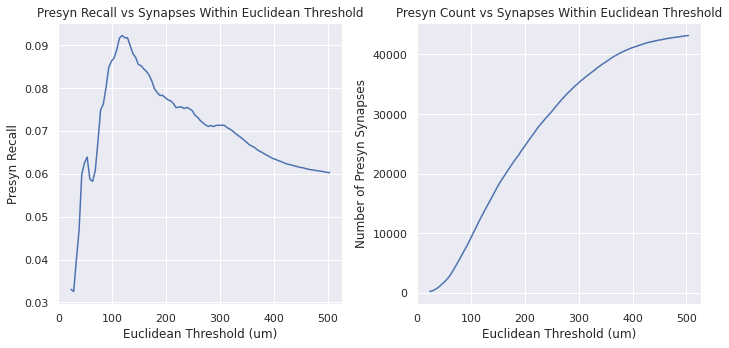

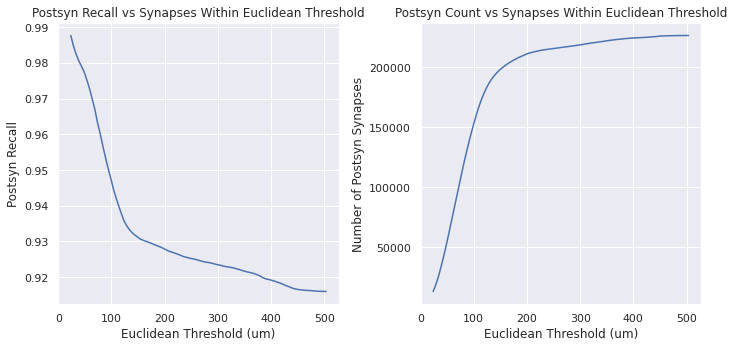

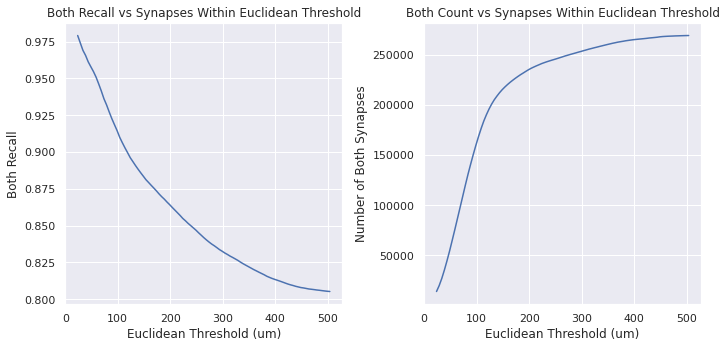

In [516]:
"""
To plot the recall vs synaptic distance

"""

for synapse_type in synapse_types:

    title = f"{synapse_type.capitalize()} Recall vs Synapses Within Euclidean Threshold"
    synapse_distances = syn_distance_samples/1000

    recall_stats = recall_by_synapse_type[synapse_type]

    #3) Plot them against each other
    fig, axes = plt.subplots(1,2,figsize=(fig_width*2, fig_height))
    ax = axes[0]
    
    ax.plot(synapse_distances,recall_stats)
    ax.set_xlabel(f"Euclidean Threshold (um)")
    ax.set_ylabel(f"{synapse_type.capitalize()} Recall")
    ax.set_title(title)
    
    syn_totals = n_synapses_by_synapse_type[synapse_type]
    
    title = f"{synapse_type.capitalize()} Count vs Synapses Within Euclidean Threshold"
    ax = axes[1]
    ax.plot(synapse_distances,syn_totals)
    ax.set_xlabel(f"Euclidean Threshold (um)")
    ax.set_ylabel(f"Number of {synapse_type.capitalize()} Synapses")
    ax.set_title(title)
    
    fig.tight_layout()
    fig.show()
    

In [563]:
minnie.AutoProofreadNeurons2() & dict(spine_category="densely_spined") & "axon_length>2000"

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),split_index the index of the neuron object that resulted AFTER THE SPLITTING ALGORITHM,proof_version the version of code used for this cell typing classification,multiplicity the total number of neurons that came from the parent segment id,cell_type_predicted morphology predicted by classifier,spine_category,n_axons Number of axon candidates identified,n_apicals Number of apicals identified,axon_length length (in um) of the classified axon skeleton,axon_area # area (in um^2) of the classified axon,nucleus_id id of nucleus from the flat segmentation Equivalent to Allen: 'id'.,nuclei_distance the distance to the closest nuclei (even if no matching nuclei found),n_nuclei_in_radius the number of nuclei within the search radius of 15000 belonging to that segment,n_nuclei_in_bbox the number of nuclei within the bounding box of that soma,"soma_x x coordinate of nucleus centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm)","soma_y y coordinate of nucleus centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm)","soma_z z coordinate of nucleus centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm)",max_soma_n_faces The largest number of faces of the somas,max_soma_volume The largest volume of the somas the (volume in billions (10*9 nm^3)),n_vertices number of vertices,n_faces number of faces,n_not_processed_soma_containing_meshes the number of meshes with somas that were not processed,n_error_limbs the number of limbs that are touching multiple somas or 1 soma in multiple places,n_same_soma_multi_touching_limbs number of limbs that touch the same soma multiple times,n_multi_soma_touching_limbs number of limbs that touch multiple somas,n_somas number of soma meshes detected,n_limbs,n_branches,max_limb_n_branches,skeletal_length,max_limb_skeletal_length,median_branch_length gives information on average skeletal length to next branch point,width_median median width from mesh center without spines removed,width_no_spine_median median width from mesh center with spines removed,width_90_perc 90th percentile for width without spines removed,width_no_spine_90_perc 90th percentile for width with spines removed,n_spines,spine_density n_spines/ skeletal_length,spines_per_branch,skeletal_length_eligible the skeletal length for all branches searched for spines,n_spine_eligible_branches the number of branches that were checked for spines because passed width threshold,spine_density_eligible n_spines/skeletal_length_eligible,spines_per_branch_eligible n_spines/n_spine_eligible_branches,total_spine_volume the sum of all spine volume,spine_volume_median median of the spine volume for those spines with able to calculate volume,spine_volume_density total_spine_volume/skeletal_length,spine_volume_density_eligible total_spine_volume/skeletal_length_eligible,spine_volume_per_branch_eligible total_spine_volume/n_spine_eligible_branches,axon_angle_maximum the anlge of an identified axon,spine_density_classifier the number of spines divided by skeletal length for branches analyzed in classification,n_branches_processed the number branches used for the spine density analysis,skeletal_length_processed The total skeletal length of the viable branches used for the spine density analysis,n_branches_in_search_radius the number branches existing in the search radius used for spine density,skeletal_length_in_search_radius The total skeletal length of the branches existing in the search radius used for spine density,run_time the amount of time to run (seconds)
864691134884800250,0,0.25,30.00,5,0,0,1,3,excitatory,densely_spined,1,1,2426.212190681331,2504.2092145089505,328798,933.93,1,1,202732,128473,24927